Grau dos vértices dos países - Transações Fraudulentas:
USA: 11
India: 13
Germany: 20
South Africa: 13
UK: 18
Brazil: 12
Japan: 14
Australia: 15
France: 13
Canada: 10

Grau dos vértices dos países - Transações Não Fraudulentas:
Australia: 13
Brazil: 20
USA: 22
South Africa: 19
Canada: 14
France: 16
Japan: 17
Germany: 9
UK: 18
India: 13


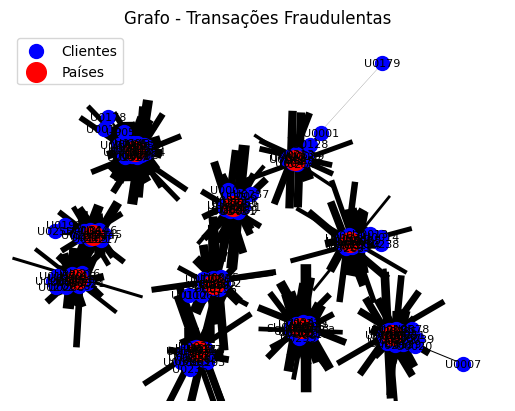

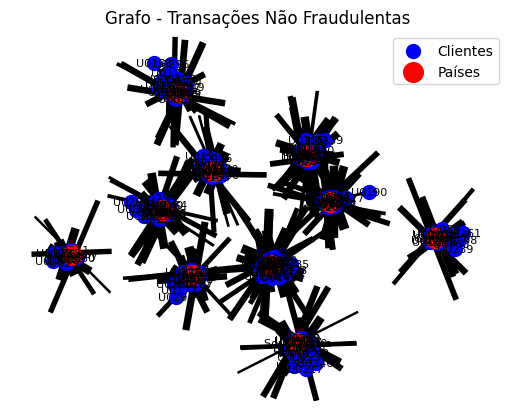

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Leitura do CSV (ajuste o separador se necessário)
df = pd.read_csv('credit_card_fraud_detection.csv', sep=',')


# Verifica se as colunas necessárias existem
colunas_necessarias = ['User ID', 'Country', 'Transaction Amount', 'Fraudulent']
if not all(col in df.columns for col in colunas_necessarias):
    raise ValueError(f"O arquivo precisa conter as colunas: {colunas_necessarias}")

# Divisão do dataset
df_fraud = df[df['Fraudulent'] == 'No']       # Transações fraudulentas
df_non_fraud = df[df['Fraudulent'] == 'Yes']     # Transações não fraudulentas

def create_graph(dataframe):
    """Cria um grafo bipartido a partir do dataframe,
       onde cada aresta conecta um id_cliente a um país
       e possui o atributo 'weight' com o transaction_amount.
    """
    G = nx.Graph()
    for index, row in dataframe.iterrows():
        client = row['User ID']
        country = row['Country']
        amount = row['Transaction Amount']

        # Adiciona os nós com um atributo para diferenciar
        G.add_node(client, tipo='cliente')
        G.add_node(country, tipo='pais')

        # Adiciona a aresta com o peso
        G.add_edge(client, country, weight=amount)
    return G

# Criação dos grafos para cada subconjunto
G_fraud = create_graph(df_fraud)
G_non_fraud = create_graph(df_non_fraud)

# Cálculo do grau dos vértices de países
degree_fraud = {node: G_fraud.degree(node)
                for node, attr in G_fraud.nodes(data=True)
                if attr.get('tipo') == 'pais'}

degree_non_fraud = {node: G_non_fraud.degree(node)
                    for node, attr in G_non_fraud.nodes(data=True)
                    if attr.get('tipo') == 'pais'}

print("Grau dos vértices dos países - Transações Fraudulentas:")
for pais, grau in degree_fraud.items():
    print(f"{pais}: {grau}")

print("\nGrau dos vértices dos países - Transações Não Fraudulentas:")
for pais, grau in degree_non_fraud.items():
    print(f"{pais}: {grau}")

def plot_graph(G, title):
    """Plota o grafo G com diferenciamento dos nós e
       as arestas com largura proporcional ao peso.
    """
    pos = nx.spring_layout(G, seed=42)  # layout para uma melhor visualização
    # Separa nós por tipo
    clientes = [node for node, attr in G.nodes(data=True) if attr.get('tipo') == 'cliente']
    paises = [node for node, attr in G.nodes(data=True) if attr.get('tipo') == 'pais']

    # Desenha os nós
    nx.draw_networkx_nodes(G, pos, nodelist=clientes, node_color='blue', label='Clientes', node_size=100)
    nx.draw_networkx_nodes(G, pos, nodelist=paises, node_color='red', label='Países', node_size=200)

    # Desenha as arestas com largura proporcional ao transaction_amount
    edges = G.edges(data=True)
    # É possível ajustar o fator de escala se os valores forem muito altos ou baixos
    scale_factor = 0.1
    edge_widths = [data['weight'] * scale_factor for (_, _, data) in edges]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_widths)

    # Adiciona os rótulos
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title(title)
    plt.legend(scatterpoints=1)
    plt.axis('off')
    plt.show()

# Plot dos grafos
plot_graph(G_fraud, "Grafo - Transações Fraudulentas")
plot_graph(G_non_fraud, "Grafo - Transações Não Fraudulentas")


Grau dos vértices dos países (UK e Germany):
Germany: 5
UK: 6


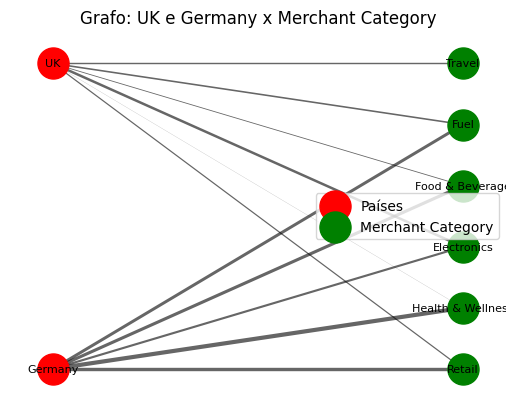

In [3]:
# Agora, utilizando apenas UK e Germany, vamos criar um novo grafo
# conectando 'Country' e 'Merchant Category'

# Define os países de interesse
selected_countries = ["UK", "Germany"]

# Filtra o DataFrame de transações fraudulentas para manter apenas os países selecionados
df_fraud_selected = df_fraud[df_fraud['Country'].isin(selected_countries)]

def create_graph_country_category(dataframe):
    """
    Cria um grafo bipartido conectando 'Country' e 'Merchant Category'
    com arestas ponderadas pelo 'Transaction Amount'.
    """
    G = nx.Graph()
    for _, row in dataframe.iterrows():
        country = row['Country']
        merchant_category = row['Merchant Category']
        amount = row['Transaction Amount']

        # Adiciona os nós com atributo para diferenciar
        G.add_node(country, tipo='pais')
        G.add_node(merchant_category, tipo='merchant_category')

        # Adiciona a aresta com o peso
        G.add_edge(country, merchant_category, weight=amount)
    return G

# Cria o grafo com apenas os países selecionados
G_country_category_selected = create_graph_country_category(df_fraud_selected)

# Calcula o grau dos vértices dos países no novo grafo
degree_country_category_selected = {
    node: G_country_category_selected.degree(node)
    for node, attr in G_country_category_selected.nodes(data=True)
    if attr.get('tipo') == 'pais'
}

print("\nGrau dos vértices dos países (UK e Germany):")
for country, degree in degree_country_category_selected.items():
    print(f"{country}: {degree}")

def plot_graph_country_category(G, title):
    """
    Plota o grafo bipartido com vértices 'Country' e 'Merchant Category',
    normalizando as larguras das arestas para evitar linhas muito grossas.
    """
    # Separa os nós por tipo
    countries = [node for node, attr in G.nodes(data=True) if attr.get('tipo') == 'pais']
    merchant_categories = [node for node, attr in G.nodes(data=True) if attr.get('tipo') == 'merchant_category']

    # Usa layout bipartido para organizar os conjuntos
    pos = nx.bipartite_layout(G, countries)

    # Desenha os nós de países (vermelho) e Merchant Categories (verde)
    nx.draw_networkx_nodes(G, pos, nodelist=countries, node_color='red', label='Países', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=merchant_categories, node_color='green', label='Merchant Category', node_size=500)

    # Coleta as arestas e seus atributos
    edges = list(G.edges(data=True))

    if edges:
        # Extrai todos os pesos
        weights = [edata['weight'] for (_, _, edata) in edges]

        # Garante que não estamos dividindo por zero caso todos os pesos sejam iguais
        min_w, max_w = min(weights), max(weights)

        if min_w == max_w:
            # Se todos os valores forem iguais, define uma largura fixa
            edge_widths = [1.0] * len(edges)
        else:
            # Define intervalo de espessura desejado
            min_width, max_width = 0.1, 3.0
            # Normaliza cada peso para o intervalo [min_width, max_width]
            edge_widths = [
                min_width + (w - min_w) * (max_width - min_width) / (max_w - min_w)
                for w in weights
            ]
    else:
        edge_widths = []

    # Desenha as arestas com as larguras normalizadas
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_widths, alpha=0.6)

    # Desenha rótulos dos nós
    nx.draw_networkx_labels(G, pos, font_size=8)

    plt.title(title)
    plt.legend(scatterpoints=1)
    plt.axis('off')
    plt.show()

# Plota o grafo com apenas os países UK e Germany e suas respectivas Merchant Categories
plot_graph_country_category(G_country_category_selected, "Grafo: UK e Germany x Merchant Category")